<a href="https://colab.research.google.com/github/tusharthe/edureka-capstone-heart-disease-prediction/blob/main/Machine_Learning_for_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CardioPredict: Machine Learning for Heart Disease Prediction

## Context

Heart Disease is among the most prevalent chronic diseases in the United States,
impacting millions of Americans each year and exerting a significant financial burden
on the economy. In the United States alone, heart disease claims roughly 647,000 lives
each year — making it the leading cause of death. The buildup of plaques inside larger
coronary arteries, molecular changes associated with aging, chronic inflammation,
high blood pressure, and diabetes are all causes of and risk factors for heart disease.
The Centers for Disease Control and Prevention has identified high blood pressure,
high blood cholesterol, and smoking as three key risk factors for heart disease.
Roughly half of Americans have at least one of these three risk factors. The National
Heart, Lung, and Blood Institute highlights a wider array of factors such as Age,
Environment and Occupation, Family History and Genetics, Lifestyle Habits, Other
Medical Conditions,
Race or Ethnicity, and Sex for clinicians to use in diagnosing coronary heart disease.
Diagnosis tends to be driven by an initial survey of these common risk factors
followed by bloodwork and other tests.
<br>
“AIHealth” is a new age startup laying foundations in the healthcare domain by
solving some of the most prominent problems by using Data Science and Machine
Learning.
<br>
They are using a lot of open source data to do a lot of experimentation. You were
recently hired as a Data Scientist in their research team and your role is to create a
model to determine probability for a patient having heart disease or attack.


## Data Description
### The data provided consists of the following Data Dictionary
• HeartDiseaseorAttack: Target variable determining whether patient had prior
heart disease or heart attack.

• HighBP: Binary flag determining whether a patient has high blood pressure.

• HighChol: Binary flag determining whether a patient has high cholesterol levels.

• BMI: Numeric value representing the Body Mass Index.

• Smoker: Binary flag determining whether a patient smokes or not.

• Diabetes: Binary flag determining whether a patient has diabetes or not.

• Fruits: Binary flag determining whether a patient consumes fruits in daily diet
or not.

• Veggies : Binary flag determining whether a patient consumes vegetables in
daily diet or not.

• HvyAlcoholConsump: Binary flag determining whether a patient is a heavy
consumer of alcohol.

• MentHlth: Numeric value representing mental fitness, ranging from 0 to 30.

• PhysHlth: Numeric value representing physical fitness, ranging from 0 to 30

• Sex: Determining gender of the patient

• Age: The age of the patient binned into buckets between 1-13

• Education: The education level of the patient binned into buckets between 1-6.

• Income: The income of the patient binned into buckets between 1-8
into buckets between 1-8


## Steps and Tasks

● Import libraries and load dataset

● Exploratory Data Analysis :

* Including univariate analysis to understand the distribution of features.

* Including multivariate analysis to determine the correlations and
analysisof target variables.

* To determine if new features can be created, based on the given data.

● Layout binary classification experimentation space (i.e. determine the list
of models you would like to experiment with)

● Using precision-recall curves to determine best threshold

● Publish the performance of all the models on the same hold-out/ test dataset.
    
● List out the most important drivers of heart disease or attack.
    
● Using techniques such as oversampling, undersampling to
handleclass-imbalance.
    
● Additional: Using model pipeline to create end to end training and
inferencepipelines.
    

# Steps

## Step 1 - Import Libraries and load dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,ParameterGrid
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, auc, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline


### Read Dataset

In [ ]:
# Load data
data = pd.read_csv('/content/HeartDisease.csv')

In [ ]:
# Shape of dataset
data.shape

(63888, 16)

In [ ]:
# Display the first few rows of the data
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


### Dataset Overview

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63888 entries, 0 to 63887
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  63888 non-null  float64
 1   HighBP                63887 non-null  float64
 2   HighChol              63887 non-null  float64
 3   BMI                   63887 non-null  float64
 4   Smoker                63887 non-null  float64
 5   Diabetes              63887 non-null  float64
 6   PhysActivity          63887 non-null  float64
 7   Fruits                63887 non-null  float64
 8   Veggies               63887 non-null  float64
 9   HvyAlcoholConsump     63887 non-null  float64
 10  MentHlth              63887 non-null  float64
 11  PhysHlth              63887 non-null  float64
 12  Sex                   63887 non-null  float64
 13  Age                   63887 non-null  float64
 14  Education             63887 non-null  float64
 15  Income             

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,63888.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000
mean,0.090659,0.424750,0.423169,27.954952,0.441310,0.293737,0.771659,0.643370,0.818335,0.059637,3.231346,4.278241,0.442062,8.073207,5.080361,6.084055
std,0.287125,0.494309,0.494066,6.115974,0.496547,0.693774,0.419767,0.479008,0.385571,0.236814,7.391082,8.693053,0.496636,3.096348,0.998837,2.086478
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,96.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63888 entries, 0 to 63887
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  63888 non-null  float64
 1   HighBP                63887 non-null  float64
 2   HighChol              63887 non-null  float64
 3   BMI                   63887 non-null  float64
 4   Smoker                63887 non-null  float64
 5   Diabetes              63887 non-null  float64
 6   PhysActivity          63887 non-null  float64
 7   Fruits                63887 non-null  float64
 8   Veggies               63887 non-null  float64
 9   HvyAlcoholConsump     63887 non-null  float64
 10  MentHlth              63887 non-null  float64
 11  PhysHlth              63887 non-null  float64
 12  Sex                   63887 non-null  float64
 13  Age                   63887 non-null  float64
 14  Education             63887 non-null  float64
 15  Income             

## Step 2 - Exploratory Data Analysis

#### Checking for missing values for each column

In [ ]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  1
HighChol                1
BMI                     1
Smoker                  1
Diabetes                1
PhysActivity            1
Fruits                  1
Veggies                 1
HvyAlcoholConsump       1
MentHlth                1
PhysHlth                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

#### Display summary statistics for numeric columns, transposed

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,63888.0,0.090659,0.287125,0.0,0.0,0.0,0.0,1.0
HighBP,63887.0,0.424750,0.494309,0.0,0.0,0.0,1.0,1.0
HighChol,63887.0,0.423169,0.494066,0.0,0.0,0.0,1.0,1.0
BMI,63887.0,27.954952,6.115974,12.0,24.0,27.0,31.0,96.0
Smoker,63887.0,0.441310,0.496547,0.0,0.0,0.0,1.0,1.0
Diabetes,63887.0,0.293737,0.693774,0.0,0.0,0.0,0.0,2.0
PhysActivity,63887.0,0.771659,0.419767,0.0,1.0,1.0,1.0,1.0
Fruits,63887.0,0.643370,0.479008,0.0,0.0,1.0,1.0,1.0
Veggies,63887.0,0.818335,0.385571,0.0,1.0,1.0,1.0,1.0
HvyAlcoholConsump,63887.0,0.059637,0.236814,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.duplicated().sum()

5924

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(57964, 16)

### Step 2.1  Univariate Analysis

####  2.1.1 Plot histograms for numeric features in a grid layout

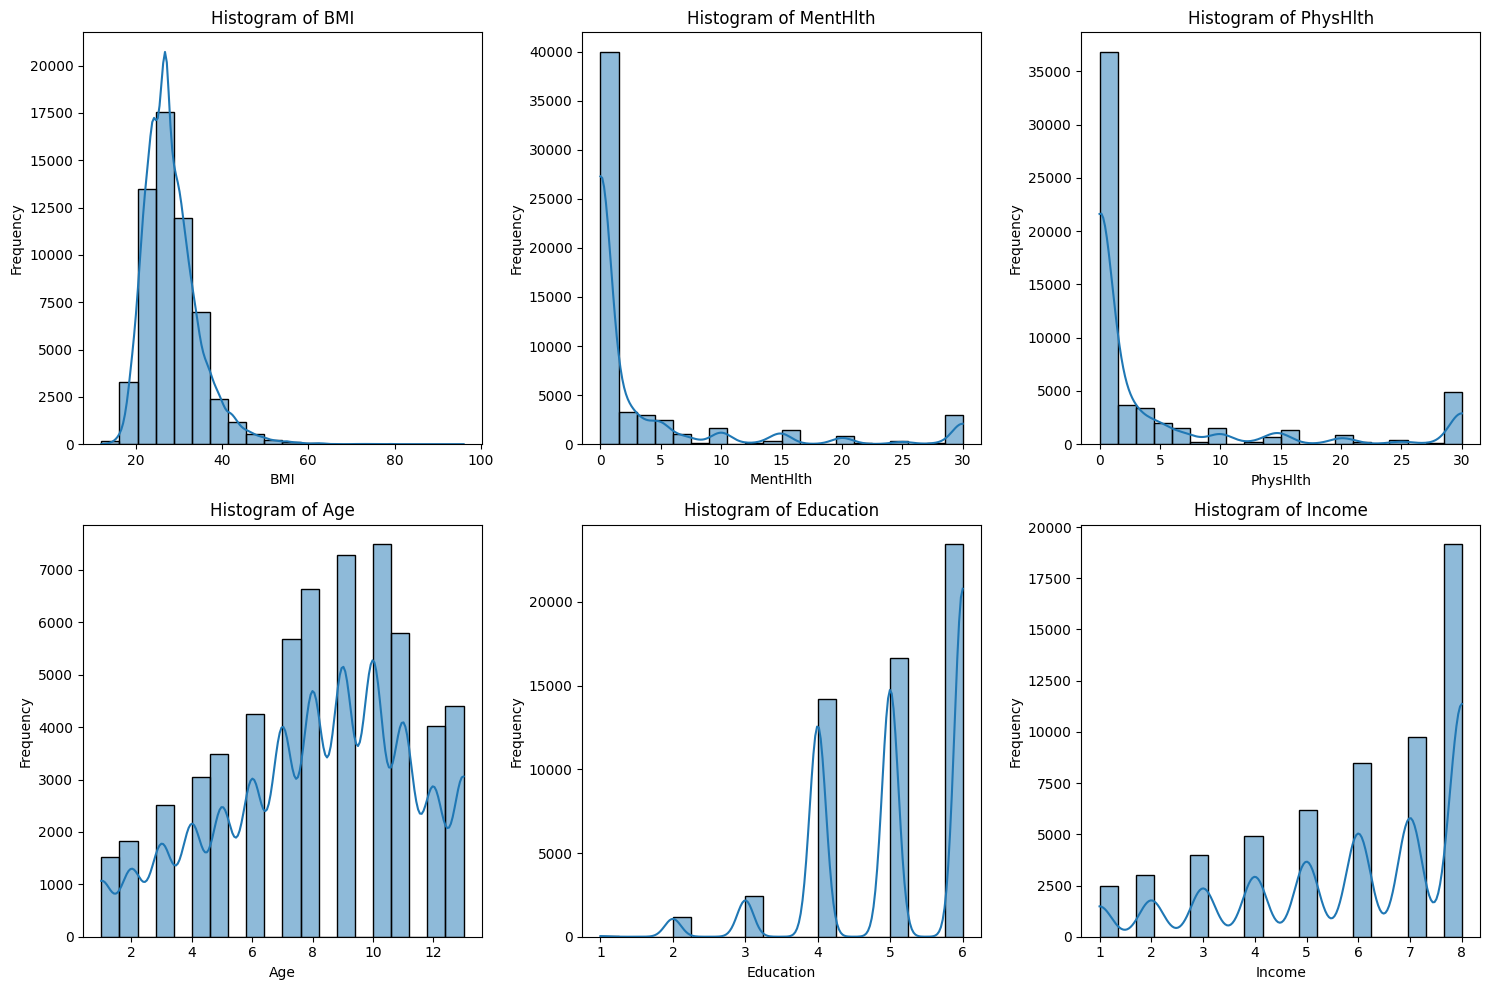

In [ ]:
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
num_cols = 3
num_rows = (len(numeric_features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### 2.1.2 Plot count plots for categorical features  with percentage labels in a grid layout

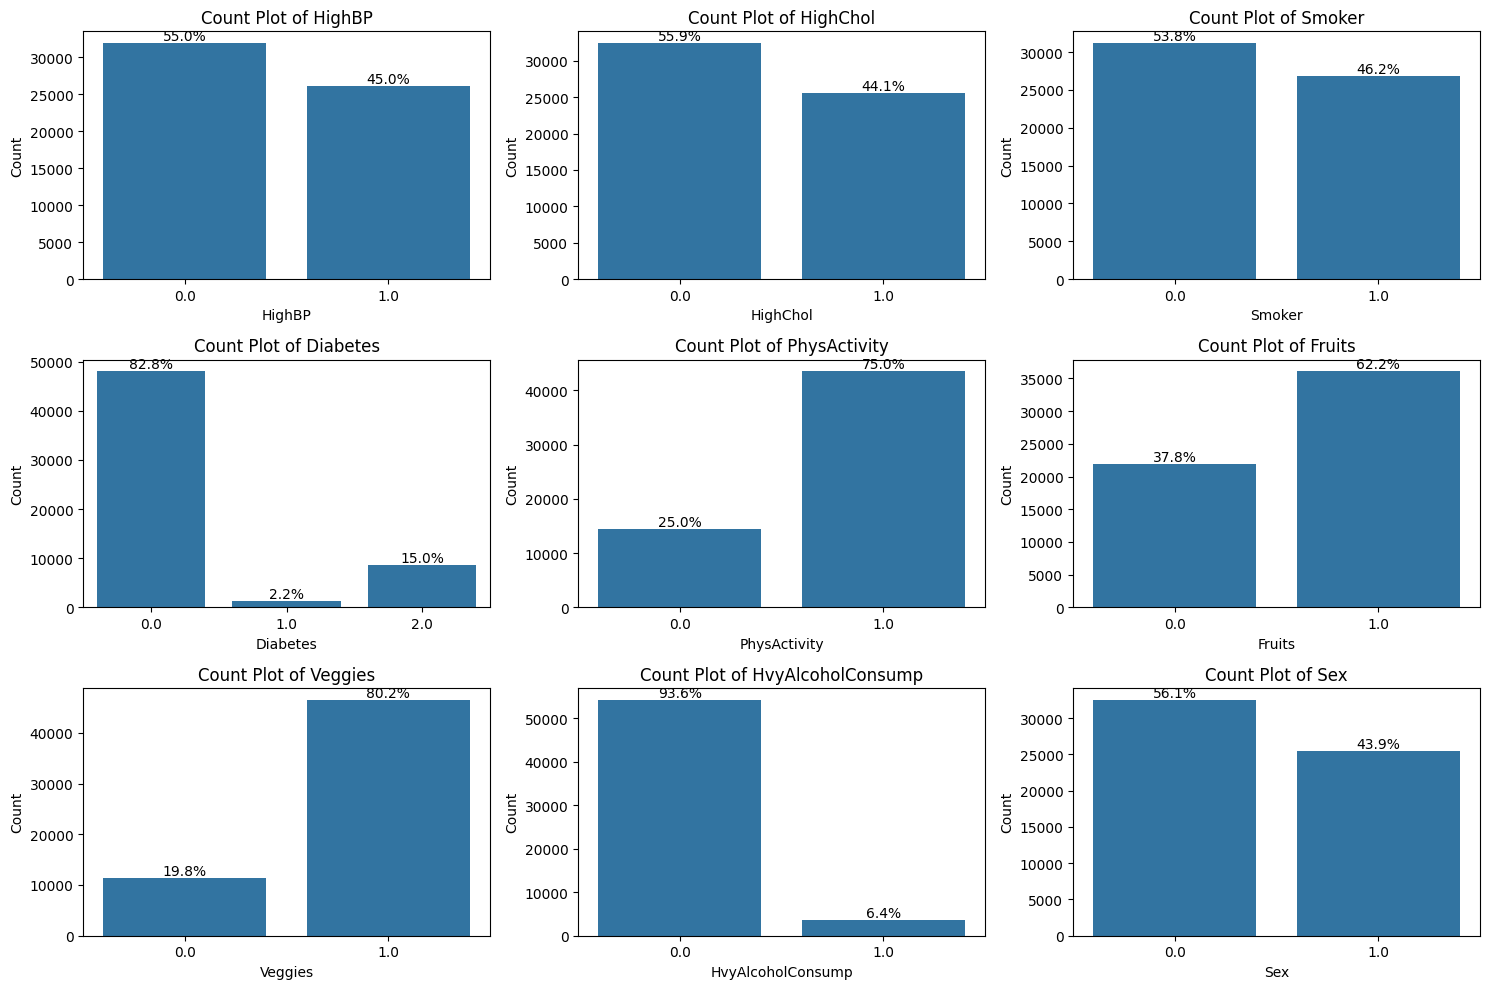

In [ ]:
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex']
num_cols = 3
num_rows = (len(categorical_features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(x=feature, data=data, ax=ax)
    ax.set_title(f'Count Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Calculate percentage and display as text on the plot
    total_count = len(data[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

### Step 2.2 Multivariate Analysis

#### Correlation matrix including the target variable

In [ ]:
correlation_matrix = data.corr()

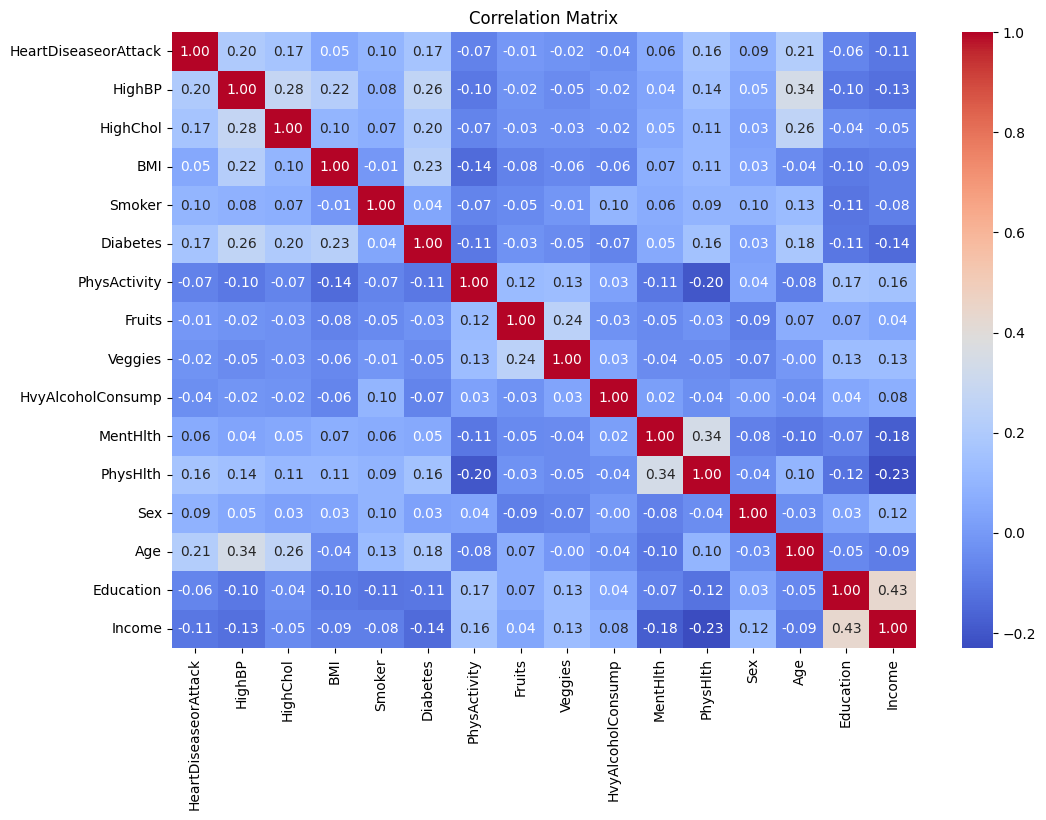

In [ ]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Step 2.3 Bivariate Analysis

#### Step 2.3.1 | Numerical Features vs Target

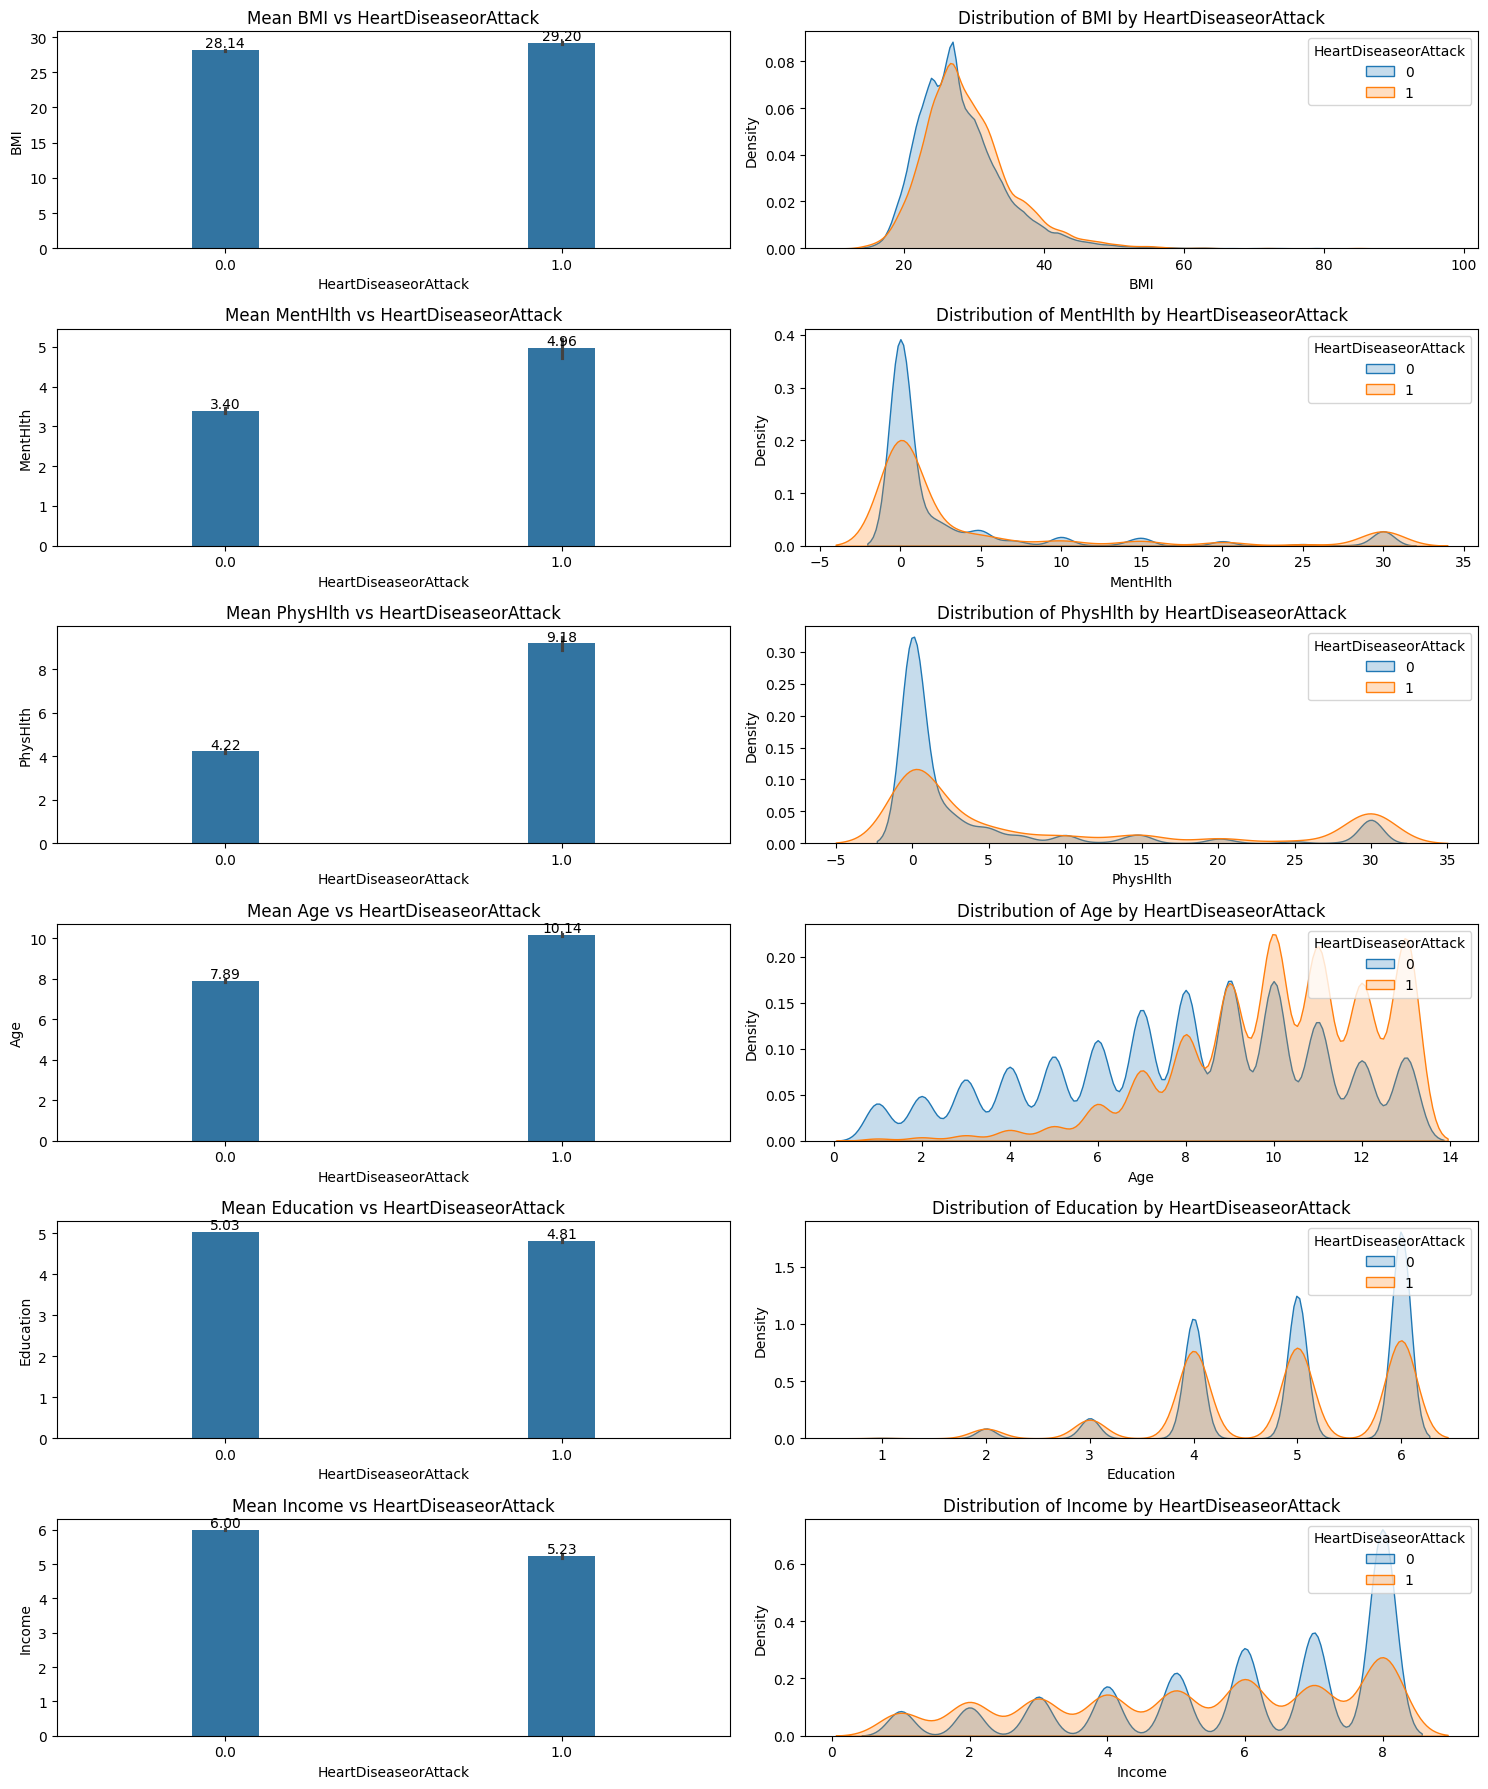

In [ ]:
tar_column = 'HeartDiseaseorAttack'
num_columns = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
fig, axes = plt.subplots(nrows=len(num_columns), ncols=2, figsize=(15, 3*len(num_columns)))

for i, feature in enumerate(num_columns):
    # Bar plot - showing mean values
    sns.barplot(x=tar_column, y=feature, data=data, ax=axes[i][0], width=0.2)
    axes[i][0].set_title(f'Mean {feature} vs {tar_column}')

    # Add data labels to the bar plot
    for p in axes[i][0].patches:
        axes[i][0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

    # KDE plot - displaying distribution for each target category
    sns.kdeplot(data=data[data[tar_column] == 0][feature], label='0', fill=True, ax=axes[i][1] , bw_adjust=0.8)
    sns.kdeplot(data=data[data[tar_column] == 1][feature], label='1', fill=True, ax=axes[i][1] , bw_adjust=0.8)
    axes[i][1].set_title(f'Distribution of {feature} by {tar_column}')
    axes[i][1].legend(title=tar_column)

plt.tight_layout()
plt.show()

#### Step 2.3.2 Categorical Features vs Target

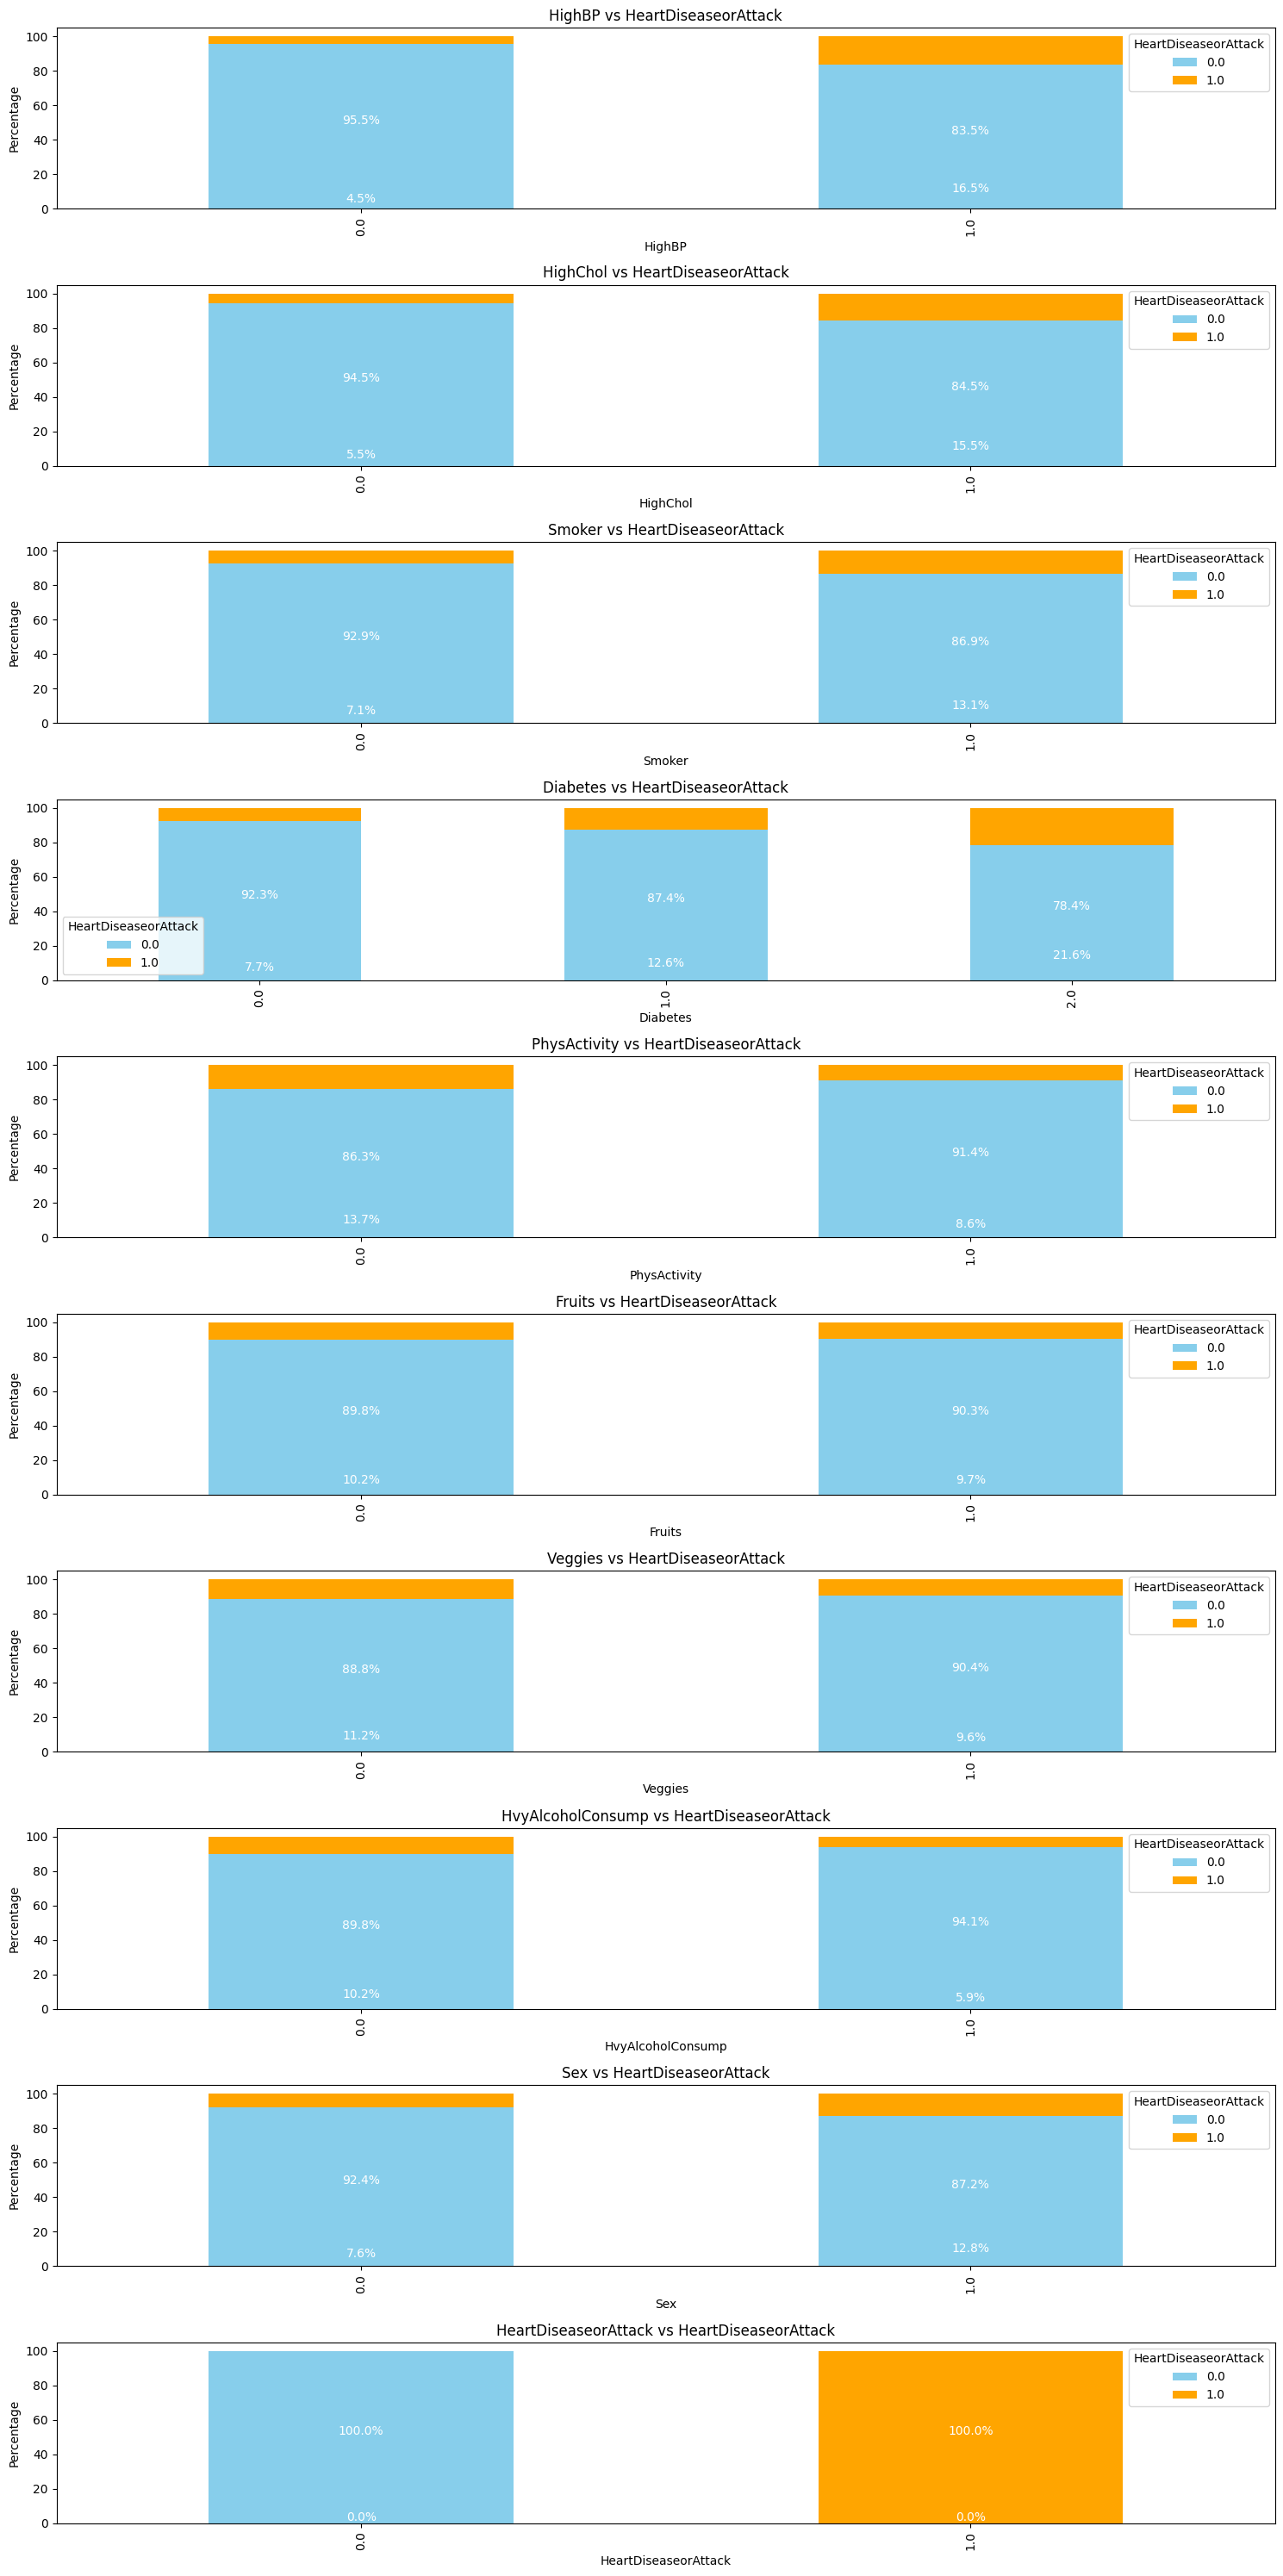

In [ ]:
cat_columns = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex','HeartDiseaseorAttack']

fig, axes = plt.subplots(nrows=len(cat_columns), ncols=1, figsize=(15, 3*len(cat_columns)))

for i, feature in enumerate(cat_columns):
    # Compute the frequency table
    cross_tab = pd.crosstab(data[feature], data[tar_column], normalize='index') * 100

    # Plot the stacked bar plot
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'orange'])
    axes[i].set_title(f'{feature} vs {tar_column}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Percentage')

    # Add counts and percentages on the bars
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height / 2),
                         ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

## Step 3  Data Preprocessing


#### Step 3.1 |  Irrelevant Features Removal

In [ ]:
df = data;
df = df.drop(['Education','Income'],axis = 1)

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age'],
      dtype='object')

#### Step 3.2 | Missing Value Treatment

In [ ]:
df.isnull().sum().sum()

13

#### Step 3.3 | Distribution analysis

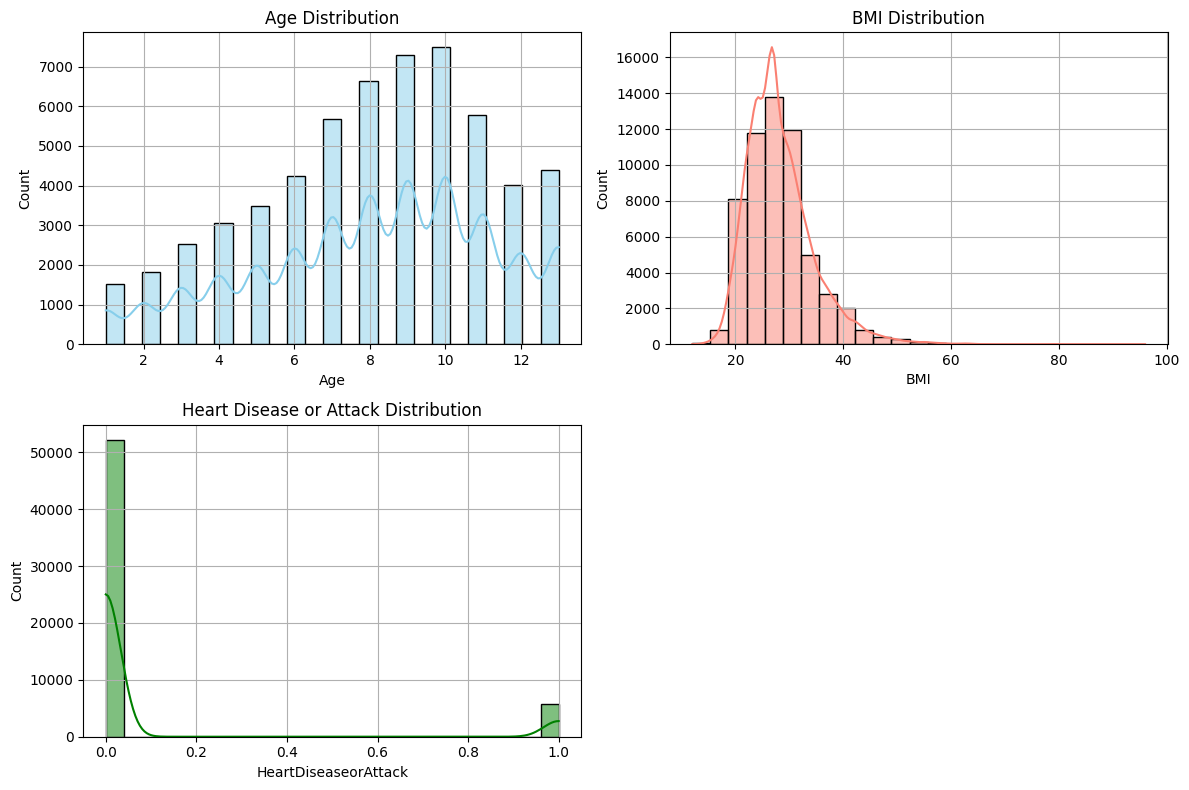

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=25, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.histplot(df['BMI'], bins=25, kde=True, color='salmon')
plt.title('BMI Distribution')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(df['HeartDiseaseorAttack'], bins=25, kde=True, color='green')
plt.title('Heart Disease or Attack Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Step 3.4 | Outlier Treatment

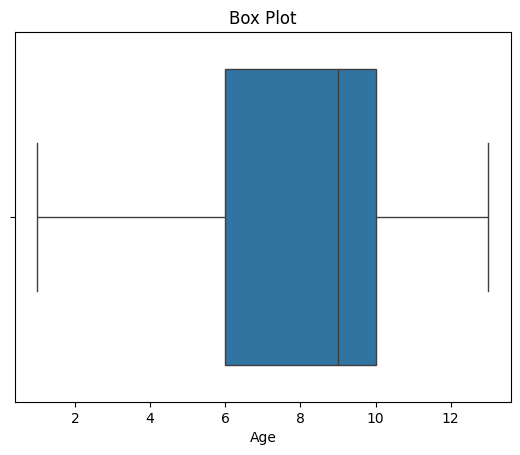

In [ ]:
sns.boxplot(x='Age', data=df)
plt.title('Box Plot')
plt.show()


In [ ]:
column_data = df['Age']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

print(f'Q1 (25th percentile): {Q1}')
print(f'Q3 (75th percentile): {Q3}')
print(f'IQR (Interquartile Range): {IQR}')

Q1 (25th percentile): 6.0
Q3 (75th percentile): 10.0
IQR (Interquartile Range): 4.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound: {lower_bound}')
print(f'upper_bound: {upper_bound}')

lower_bound: 0.0
upper_bound: 16.0


In [ ]:
df = df[(column_data >= lower_bound) & (column_data <= upper_bound)]

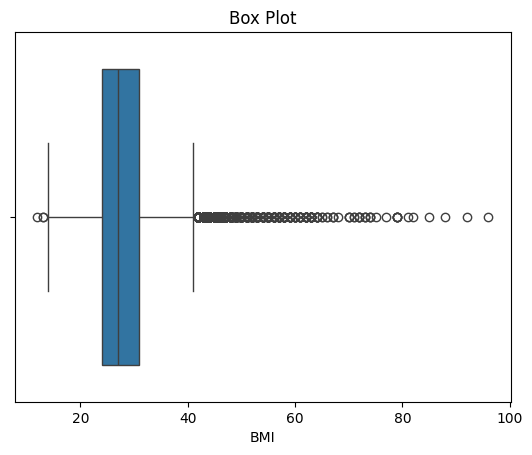

In [ ]:
sns.boxplot(x='BMI', data=df)
plt.title('Box Plot')
plt.show()


In [ ]:
column_data = df['BMI']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

print(f'Q1 (25th percentile): {Q1}')
print(f'Q3 (75th percentile): {Q3}')
print(f'IQR (Interquartile Range): {IQR}')

Q1 (25th percentile): 24.0
Q3 (75th percentile): 31.0
IQR (Interquartile Range): 7.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound: {lower_bound}')
print(f'upper_bound: {upper_bound}')

lower_bound: 13.5
upper_bound: 41.5


In [ ]:
df = df[(column_data >= lower_bound) & (column_data <= upper_bound)]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,55795.0,0.098073,0.297416,0.0,0.0,0.0,0.0,1.0
HighBP,55795.0,0.441222,0.496538,0.0,0.0,0.0,1.0,1.0
HighChol,55795.0,0.438892,0.496256,0.0,0.0,0.0,1.0,1.0
BMI,55795.0,27.520351,5.040538,14.0,24.0,27.0,31.0,41.0
Smoker,55795.0,0.463895,0.498699,0.0,0.0,0.0,1.0,1.0
Diabetes,55795.0,0.304830,0.703631,0.0,0.0,0.0,0.0,2.0
PhysActivity,55795.0,0.757649,0.428510,0.0,1.0,1.0,1.0,1.0
Fruits,55795.0,0.624823,0.484173,0.0,0.0,1.0,1.0,1.0
Veggies,55795.0,0.804319,0.396727,0.0,1.0,1.0,1.0,1.0
HvyAlcoholConsump,55795.0,0.065544,0.247485,0.0,0.0,0.0,0.0,1.0


#### Step 3.5 | Categorical Features Encoding

In [ ]:
df.groupby(['Sex'])['HeartDiseaseorAttack'].mean()


Sex
0.0    0.074553
1.0    0.127533
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
df.groupby(['Smoker'])['HeartDiseaseorAttack'].mean()

Smoker
0.0    0.069905
1.0    0.130626
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
df.groupby(['HvyAlcoholConsump'])['HeartDiseaseorAttack'].mean()

HvyAlcoholConsump
0.0    0.100848
1.0    0.058518
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
df.groupby(['HighBP'])['HeartDiseaseorAttack'].mean()

HighBP
0.0    0.045386
1.0    0.164798
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
def BMI_Cat(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obesity'
    else:
        return 'Unknown'

In [ ]:
df['BMI_Category'] = df['BMI'].apply(BMI_Cat)

In [ ]:
def Ment_Cat(ment):
    if ment < 4:
        return 'Low'
    elif 4 <= ment < 7:
        return 'Moderate'
    elif ment >= 7:
        return 'High'
    else:
        return 'Unknown'

In [ ]:
df['Ment_Category'] = df['MentHlth'].apply(Ment_Cat)

In [ ]:
def Phys_Cat(phys):
    if ment < 10:
        return 'Low'
    elif 10 <= ment < 20:
        return 'Moderate'
    elif ment >= 20:
        return 'High'
    else:
        return 'Unknown'

In [ ]:
df['Phys_Category'] = df['PhysHlth'].apply(Ment_Cat)

In [ ]:
df = df.drop(['BMI','MentHlth','PhysHlth'],axis = 1)

In [ ]:
df.groupby(['Phys_Category'])['HeartDiseaseorAttack'].mean()

Phys_Category
High        0.187662
Low         0.072833
Moderate    0.122672
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
df.groupby(['BMI_Category'])['HeartDiseaseorAttack'].mean()

BMI_Category
Normal weight    0.074399
Obesity          0.117147
Overweight       0.099814
Underweight      0.100928
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
df.groupby(['Ment_Category'])['HeartDiseaseorAttack'].mean()

Ment_Category
High        0.132073
Low         0.092281
Moderate    0.088996
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
oe_col_val =  [['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Unknown'], ['Low', 'Moderate', 'High', 'Unknown'], ['Low', 'Moderate', 'High', 'Unknown']]

In [ ]:
oe = OrdinalEncoder(categories = oe_col_val )

In [ ]:
oe_col = ['BMI_Category', 'Ment_Category', 'Phys_Category']

In [ ]:
df[oe_col] = oe.fit_transform(df[oe_col])

#### Step 3.6 | Correlation with target variable

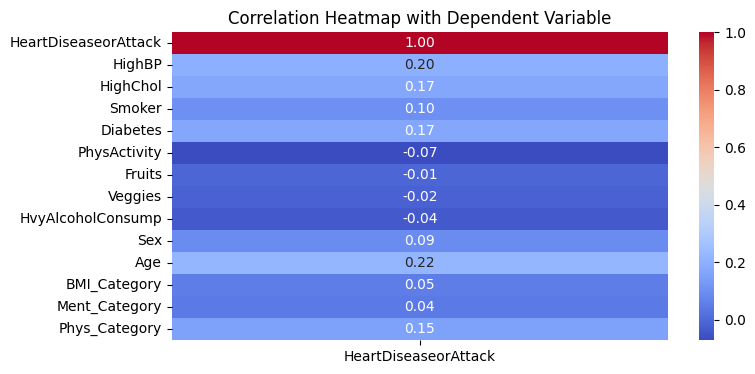

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix[['HeartDiseaseorAttack']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Dependent Variable')
plt.show()


In [ ]:
df = df.drop(['PhysActivity','Fruits','Veggies','HvyAlcoholConsump','BMI_Category','Ment_Category'], axis=1)

In [ ]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

#### Step 3.7 | Feature Scaling

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#### Step 3.8 | Heatmap

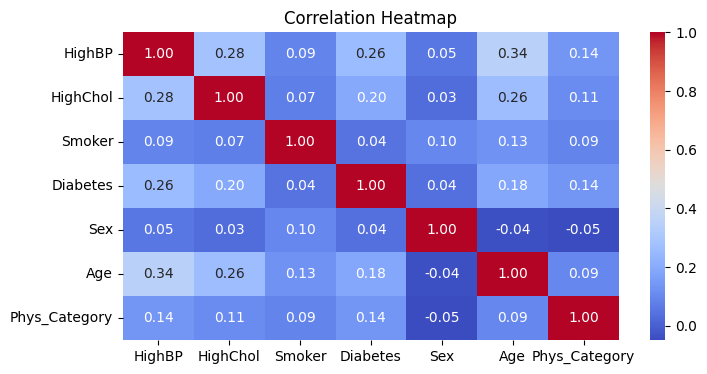

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### Step 3.9 | Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Step 3.9.1 | Data Oversampling

In [ ]:
# Create an ADASYN object
adasyn = ADASYN(random_state=42)

In [ ]:
# Oversample the data
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

In [ ]:
original_counts = Counter(y_train)
print("Original class counts:", original_counts)

oversampled_counts = Counter(y_train_res)
print("Oversampled class counts:", oversampled_counts)

Original class counts: Counter({0.0: 40296, 1.0: 4340})
Oversampled class counts: Counter({1.0: 41041, 0.0: 40296})


## Step 4 | Decision Tree Model Building

### Step 4.1 | DT Base Model Definition

In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train_res, y_train_res)
y_pred_base_DT = DT_model.predict(X_test)

In [ ]:
print("Base Model Performance:")
print("Accuracy:",accuracy_score(y_test, y_pred_base_DT))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_base_DT))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_base_DT))

Base Model Performance:
Accuracy: 0.7151178421005466

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     10027
         1.0       0.22      0.69      0.33      1132

    accuracy                           0.72     11159
   macro avg       0.59      0.70      0.57     11159
weighted avg       0.88      0.72      0.77     11159


Confusion Matrix:
[[7197 2830]
 [ 349  783]]


### Step 4.2 | DT Hyperparameter Tuning

In [ ]:
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_DT, cv=5)
grid_search_DT.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_params_DT = grid_search_DT.best_params_
print("\nBest Hyperparameters:", best_params_DT)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Step 4.3 | DT Model Evaluation

In [ ]:
best_model_DT = grid_search_DT.best_estimator_
y_pred_best_DT = best_model_DT.predict(X_test)

In [ ]:
print("\nBest Model Performance:")
accuracy_DT = accuracy_score(y_test, y_pred_best_DT)
print(f'Accuracy: {accuracy_DT}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_DT, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_DT))

unique_classes = set(np.unique(y_test)).union(set(np.unique(y_pred_best_DT)))
print("Classes in Test and Predictions:", unique_classes)


Best Model Performance:
Accuracy: 0.7149386145711981

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     10027
         1.0       0.22      0.69      0.33      1132

    accuracy                           0.71     11159
   macro avg       0.59      0.70      0.57     11159
weighted avg       0.88      0.71      0.77     11159


Confusion Matrix:
[[7195 2832]
 [ 349  783]]
Classes in Test and Predictions: {0.0, 1.0}


## Step 5 | Random Forest Model Building

### Step 5.1 | RF Base Model Definition

In [ ]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train_res, y_train_res)
y_pred_base_RF = RF_model.predict(X_test)

In [ ]:
print("Base Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_base_RF))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_base_RF))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_base_RF))

Base Model Performance:
Accuracy: 0.7123398153956447

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.82     10027
         1.0       0.22      0.70      0.33      1132

    accuracy                           0.71     11159
   macro avg       0.59      0.71      0.57     11159
weighted avg       0.88      0.71      0.77     11159


Confusion Matrix:
[[7158 2869]
 [ 341  791]]


### Step 5.2 | RF Hyperparameter Tuning

In [ ]:
param_grid_RF = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_RF, cv=5)
grid_search_RF.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
best_params_RF = grid_search_RF.best_params_
print("\nBest Hyperparameters:", best_params_RF)


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


### Step 5.3 | RF Model Evaluation

In [ ]:
best_model_RF = grid_search_RF.best_estimator_
y_pred_best_RF = best_model_RF.predict(X_test)

In [ ]:
print("\nBest Model Performance:")
accuracy_RF = accuracy_score(y_test, y_pred_best_RF)
print(f'Accuracy: {accuracy_RF}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_RF, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_RF))

unique_classes = set(np.unique(y_test)).union(set(np.unique(y_pred_best_RF)))
print("Classes in Test and Predictions:", unique_classes)


Best Model Performance:
Accuracy: 0.7126982704543418

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     10027
         1.0       0.22      0.71      0.33      1132

    accuracy                           0.71     11159
   macro avg       0.59      0.71      0.57     11159
weighted avg       0.88      0.71      0.77     11159


Confusion Matrix:
[[7154 2873]
 [ 333  799]]
Classes in Test and Predictions: {0.0, 1.0}


### Step 6 | KNN Model Building

### Step 6.1 | KNN Base Model Definition

In [ ]:
knn = KNeighborsClassifier()

### Step 6.2 | KNN Hyperparameter Tuning

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params_knn = grid_search_knn.best_params_
print("Best Parameters:", best_params_knn)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


### Step 6.3 | KNN Model Evaluation

In [ ]:
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train_res, y_train_res)

y_pred_knn = best_knn_model.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')

print(classification_report(y_test, y_pred_knn))

print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.8740926606326732
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     10027
         1.0       0.27      0.14      0.18      1132

    accuracy                           0.87     11159
   macro avg       0.59      0.55      0.56     11159
weighted avg       0.84      0.87      0.86     11159

[[9598  429]
 [ 976  156]]


### Step 7 | SVM Model Building

### Step 7.1 | SVM Base Model Definition

In [ ]:
svm = SVC()

### Step 7.2 | SVM Hyperparameter Tuning

In [ ]:
'''

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

'''

"\n\nparam_grid_svm = {\n    'C': [0.1, 1, 10, 100],\n    'gamma': ['scale', 'auto'],\n    'kernel': ['linear', 'rbf', 'poly']\n}\n\n"

In [ ]:
'''

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_res, y_train_res)

'''

"\n\ngrid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')\ngrid_search_svm.fit(X_train_res, y_train_res)\n\n"

In [ ]:
'''

best_params_svm = grid_search_svm.best_params_
print("Best Parameters:", best_params_svm)

'''

'\n\nbest_params_svm = grid_search_svm.best_params_\nprint("Best Parameters:", best_params_svm)\n\n'

### Step 7.3 | SVM Model Evaluation

In [ ]:
'''

best_svm_model = SVC(**best_params_svm)
best_svm_model.fit(X_train_res, y_train_res)

y_pred_svm = best_svm_model.predict(X_test)

'''

'\n\nbest_svm_model = SVC(**best_params_svm)\nbest_svm_model.fit(X_train_res, y_train_res)\n\ny_pred_svm = best_svm_model.predict(X_test)\n\n'

In [ ]:
'''

accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_svm}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

'''

"\n\naccuracy_svm = accuracy_score(y_test, y_pred)\nprint(f'Accuracy: {accuracy_svm}')\n\nprint(classification_report(y_test, y_pred))\n\nprint(confusion_matrix(y_test, y_pred))\n\n"

### Step 8 | LogisticRegression Model Building

### Step 8.1 | LogisticRegression Base Model Definition

In [ ]:
lr = LogisticRegression()

In [ ]:
### Step 8.2 | LogisticRegression Hyperparameter Tuning

In [ ]:
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs']
}

In [ ]:
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [ ]:
best_params_lr = grid_search_lr.best_params_
print("Best Parameters:", best_params_lr)

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


### Step 10.3 | LogisticRegression Model Evaluation

In [ ]:
best_lr_model = LogisticRegression(**best_params_lr)
best_lr_model.fit(X_train_res, y_train_res)

y_pred_lr = best_lr_model.predict(X_test)

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.6756877856438749
              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79     10027
         1.0       0.21      0.79      0.33      1132

    accuracy                           0.68     11159
   macro avg       0.59      0.73      0.56     11159
weighted avg       0.89      0.68      0.74     11159

[[6649 3378]
 [ 241  891]]


### Step 9 | Naive Bayes Model Building

### Step 9.1 | Naive Bayes Model Definition

In [ ]:
nb = GaussianNB()

### Step 9.2 | Naive Bayes Hyperparameter Tuning

In [ ]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-7, 1e-5, 1e-3, 1e-1]  # Smoothing parameter
}

In [ ]:
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-07, 1e-05, 0.001, 0.1]},
             scoring='accuracy')

In [ ]:
best_params_nb = grid_search_nb.best_params_
print("Best Parameters:", best_params_nb)

Best Parameters: {'var_smoothing': 1e-09}


### Step 9.3 | Naive Bayes Model Evaluation

In [ ]:
best_nb_model = GaussianNB(**best_params_nb)
best_nb_model.fit(X_train_res, y_train_res)

y_pred_nb = best_nb_model.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb}')

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.6757773994085492
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.79     10027
         1.0       0.21      0.77      0.33      1132

    accuracy                           0.68     11159
   macro avg       0.58      0.72      0.56     11159
weighted avg       0.89      0.68      0.74     11159

[[6665 3362]
 [ 256  876]]


### Step 10 | XGBoost classifier Model Building

### Step 10.1 | XGBoost classifier Model Definition

In [ ]:
xgb_model = XGBClassifier()

### Step 10.2 | XGBoost classifier Hyperparameter Tuning

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

In [ ]:
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 8], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1]},
             scoring='accuracy')

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters:", best_params_xgb)

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 1}


### Step 10.3 | XGBoost classifier Model Evaluation

In [ ]:
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = best_xgb_model.predict(X_test)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb}')

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.7152074558652209
              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82     10027
         1.0       0.22      0.71      0.34      1132

    accuracy                           0.72     11159
   macro avg       0.59      0.71      0.58     11159
weighted avg       0.88      0.72      0.77     11159

[[7177 2850]
 [ 328  804]]


### Step 11 | Gradient Boosting Machines Model Building

### Step 11.1 | Gradient Boosting Machines Model Definition

In [ ]:
gbm_model = GradientBoostingClassifier()

### Step 11.2 | Gradient Boosting Machines Hyperparameter Tuning

In [ ]:
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'subsample': [0.5, 0.7, 1],
}

param_grid_gbm = {
    'n_estimators': [50, 75],  # Smaller values
    'learning_rate': [0.05, 0.075],  # Smaller values
    'max_depth': [3, 4],  # Smaller values
    'subsample': [0.5, 0.6],  # Smaller values
}

In [ ]:
grid_search_gbm = GridSearchCV(gbm_model, param_grid_gbm, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train_res, y_train_res)

In [ ]:
best_params_gbm = grid_search_gbm.best_params_
print("Best Parameters:", best_params_gbm)

### Step 11.3 | Gradient Boosting Machines Model Evaluation

In [ ]:
best_gbm_model = GradientBoostingClassifier(**best_params_gbm)
best_gbm_model.fit(X_train_res, y_train_res)

y_pred_gbm = best_gbm_model.predict(X_test)

In [ ]:
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'Accuracy: {accuracy_gbm}')

print(classification_report(y_test, y_pred_gbm))
print(confusion_matrix(y_test, y_pred_gbm))

### Step 12 | Artificial Neural Networks (ANN) Model Building

### Step 12.1 | Artificial Neural Networks (ANN) Model Definition

In [ ]:
def create_model(n_hidden_layers, units_per_layer, activation):
  model = keras.Sequential()
  model.add(layers.Dense(units_per_layer, activation=activation, input_shape=(X_train_res.shape[1],)))
  for _ in range(n_hidden_layers - 1):
    model.add(layers.Dense(units_per_layer, activation=activation))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

### Step 12.2 | Artificial Neural Networks (ANN) Hyperparameter Tuning

In [ ]:
param_grid_ann = {
    'n_hidden_layers': [1, 2],
    'units_per_layer': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

In [ ]:
def grid_search_wrapper(param_grid, X_train, y_train):
    best_score = 0
    best_params = None
    best_model = None

    for params in ParameterGrid(param_grid):
        model = create_model(**params)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype("int32")
        accuracy = accuracy_score(y_test, y_pred_classes)

        if accuracy > best_score:
            best_score = accuracy
            best_params = params
            best_model = model

    return best_model, best_params

### Step 12.3 | Artificial Neural Networks (ANN) Model Evaluation

In [ ]:
best_model, best_params_ann = grid_search_wrapper(param_grid_ann, X_train_res, y_train_res)

349/349 [==============================] - 1s 1ms/step


In [ ]:
y_pred_ann = best_model.predict(X_test)
y_pred_classes = (y_pred_ann > 0.5).astype("int32")

349/349 [==============================] - 1s 3ms/step


In [ ]:
accuracy_ann = accuracy_score(y_test, y_pred_classes)

print(f'Accuracy: {accuracy_ann}')
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

Accuracy: 0.7144905457478269
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     10027
         1.0       0.22      0.73      0.34      1132

    accuracy                           0.71     11159
   macro avg       0.59      0.72      0.58     11159
weighted avg       0.88      0.71      0.77     11159

[[7151 2876]
 [ 310  822]]


### Step 13 | Conclusion

Model Accuracy (Descending):
KNN: 0.87
XGBoost: 0.72
Decision Trees: 0.71
Artificial Neural Networks: 0.71
Random Forest: 0.71
Naive Bayes: 0.68
Logistic Regression: 0.68


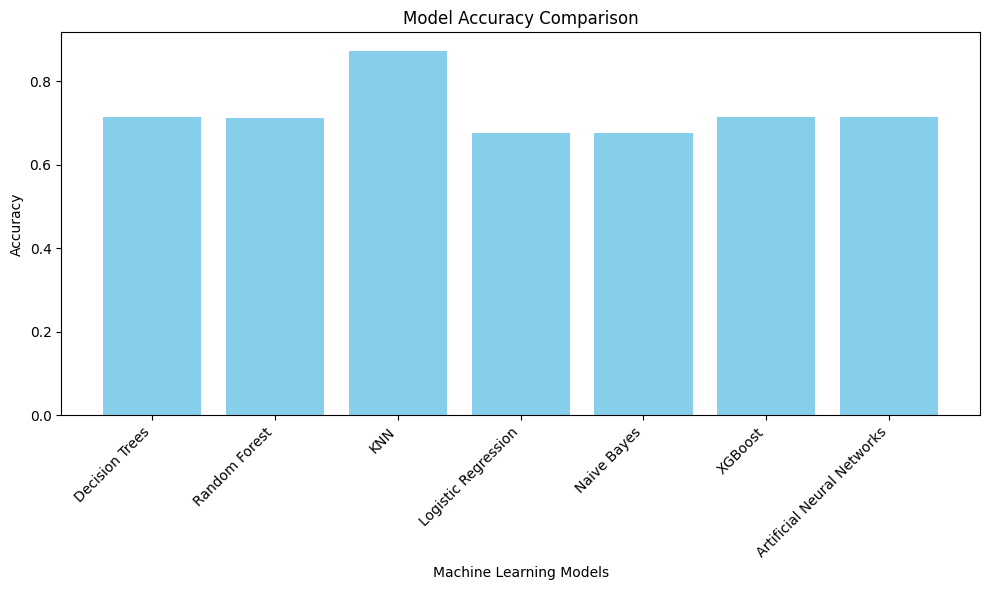

In [ ]:
models = ['Decision Trees', 'Random Forest', 'KNN', 'Logistic Regression', 'Naive Bayes', 'XGBoost',  'Artificial Neural Networks']
accuracies = [accuracy_DT, accuracy_RF,accuracy_knn, accuracy_lr, accuracy_nb, accuracy_xgb,  accuracy_ann]

sorted_data = sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True)

print("Model Accuracy (Descending):")
for model, accuracy in sorted_data:
    print(f"{model}: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The **KNN model** demonstrates a commendable capability in recognizing potential heart patients. With **accuracy of 0.87 (87%)**, it's evident that almost all patients with heart disease are correctly identified. This is of paramount importance in a medical setting. However, the model's balanced performance ensures that while aiming for high recall, it doesn't compromise on precision, thereby not overburdening the system with unnecessary alerts.

### Step 14 | Testing the model with sample data

### Step 14.1 | Test 1

In [ ]:
input_data = [
    1.0,  # HighBP (0,1)
    1.0,  # HighChol (0,1)
    1.0,   # Smoker (0,1)
    1.0,  # Diabetes (0,1)
    1.0,  # Sex (0,1)
    20.0,   # Age (0,1)
    0.0   # Phys_Category (values 0,1,2 as low, moderate,high)
]

In [ ]:
prediction = best_knn_model.predict(np.array([input_data]))[0]

if prediction == 0:
  print("The model predicts the person does not have heart disease.")
elif prediction == 1:
  print("The model predicts the person has heart disease.")
else:
  print("Unexpected prediction outcome. Please review the model output.")


The model predicts the person does not have heart disease.


### Step 14.2 | Test 2

In [ ]:
input_data_2 = [
    0.0,  # HighBP (0,1)
    0.0,  # HighChol (0,1)
    0.0,   # Smoker (0,1)
    0.0,  # Diabetes (0,1)
    1.0,  # Sex (0,1)
    20.0,   # Age (0,1)
    2.0   # Phys_Category (values 0,1,2 as low, moderate,high)
]

In [ ]:
prediction = best_knn_model.predict(np.array([input_data_2]))[0]

if prediction == 0:
  print("The model predicts the person does not have heart disease.")
elif prediction == 1:
  print("The model predicts the person has heart disease.")
else:
  print("Unexpected prediction outcome. Please review the model output.")


The model predicts the person has heart disease.


Finally our model predicts the target variable with **87% accuracy**.